# Datenanalyse mit KI & Machine Learning
## Einfache lineare Regression

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
# So könnte eine lineare Regression ablaufen:
# https://miro.medium.com/v2/resize:fit:828/1*nhGPRU12caIw7NK5Rr3p-w.gif
# Quelle: https://medium.com/swlh/from-animation-to-intuition-linear-regression-and-logistic-regression-f641a31e1caf

## Datensatz in X und y einteilen

In [3]:
taxis = sns.load_dataset("taxis")
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [4]:
# Definieren der Modellvariablen
# X - unabhängige Variable(n), mit denen wir Vorhersagen treffen
# y - abhängige Variable, die wir vorhersagen wollen
X = taxis[['distance']]
y = taxis['total']

In [8]:
X

,distance
0,1.60
1,0.79
2,1.37
3,7.70
4,2.16
...,...
6428,0.75
6429,18.74
6430,4.14
6431,1.12


In [5]:
X.shape

(6433, 1)

In [6]:
y.shape

(6433,)

In [9]:
# scikitlearn erwartet für den oder die Prädiktoren eine Dimensionalität von mindestens 2:
X.to_numpy().ndim

2

In [10]:
y.to_numpy().ndim

1

## Einfaches Splitten der Daten in train und test

In [11]:
# Parameter random_state, wenn Reproduzierbarkeit gewünscht ist
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train

,distance
915,5.50
1630,0.54
5865,4.88
3209,2.10
509,0.91
...,...
3772,1.47
5191,2.26
5226,0.90
5390,4.64


In [13]:
X_test

,distance
4092,1.30
6282,1.40
3237,2.39
1891,1.90
5010,2.40
...,...
4874,3.90
6290,2.00
151,6.71
2439,1.60


In [14]:
y_train

915     27.95
1630     7.80
5865    32.30
3209    12.30
509     14.16
        ...  
3772    13.80
5191    18.80
5226    11.80
5390    25.30
860     13.57
Name: total, Length: 5146, dtype: float64

In [15]:
y_test

4092    15.96
6282     9.80
3237    17.80
1891    17.15
5010    17.00
        ...  
4874    19.30
6290    13.30
151     44.76
2439    10.30
1033     9.30
Name: total, Length: 1287, dtype: float64

## Split in Trainings-, Validierungs- und Testdatensatz

In [17]:
# Erzeugen von Trainingsdaten und temporären Daten (zum Weitersplitten)
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.1

# temp bedeutet hier einfach temporär, zum Weitersplitten
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_ratio, random_state=42)

In [20]:
# Erzeugen von Test- und Validierungsdaten
test_size = test_ratio / (test_ratio + validation_ratio)
# print(test_size)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size, random_state=42)

In [22]:
all_data = len(X)
all_data

6433

In [23]:
# Hat unser Split funktioniert?
print(f"Der Trainingsdatensatz enthält {len(X_train) / all_data:.1%} der Daten.")
print(f"Der Validierungsdatensatz enthält {len(X_val) / all_data:.1%} der Daten.")
print(f"Der Testdatensatz enthält {len(X_test) / all_data:.1%} der Daten.")
# Alternativ shape[0]

Der Trainingsdatensatz enthält 75.0% der Daten.
Der Validierungsdatensatz enthält 15.0% der Daten.
Der Testdatensatz enthält 10.0% der Daten.


## Einfache lineare Regression

### Wird verwendet, wenn nur eine x-Variable für Regression genutzt wird

#### Hier: Können wir nur mit der distance Variable voraussagen, wie teuer unsere Taxifahrt wird?

In [24]:
# Modelltyp definieren
model = LinearRegression()

In [25]:
X_train

,distance
4586,0.60
809,2.60
2683,1.50
6253,0.75
6219,5.30
...,...
3772,1.47
5191,2.26
5226,0.90
5390,4.64


In [28]:
type(X_train)

pandas.core.frame.DataFrame

In [26]:
X_train.values

array([[0.6 ],
       [2.6 ],
       [1.5 ],
       ...,
       [0.9 ],
       [4.64],
       [0.9 ]], shape=(4824, 1))

In [27]:
type(X_train.values)

numpy.ndarray

In [29]:
# Berechnung der Parameter
# Mit X_train.values übergeben wir dem Modell das zugrundeliegende numpy-Array:
model.fit(X_train.values, y_train)

LinearRegression()

In [34]:
# Koeffizient von distance (Steigung der Geraden!)
print('Steigung:', model.coef_.item())

# Schnittpunkt mit der y-Achse (Konstante)
print('y-Achsenabschnitt:', model.intercept_.item())

Steigung: 3.292669378764966
y-Achsenabschnitt: 8.56775056143276


Ausgangsgleichung:
y = a * x + b

Interpretation:
a = 8.57 = Bei einer Distanz von 0km Fahrtstrecke beträgt der Rechnungsbetrag 8.57 Dollar.
--> ACHTUNG: INTERCEPT NICHT IMMER INTERPRETIERBAR! Nur dann, wenn unsere X-Variablen sich bis 0 erstrecken, kann der Intercept logisch interpretiert werden.

b = 3.29 = Steigt die Distanz um 1, steigt der Rechnungsbetrag um 3.29; Anders formuliert: Pro km Fahrstrecke zahlen wir 3.29$ mehr.

In [35]:
# Händische Prognose für eine gefahrene Meile:
a = model.coef_.item()
b = model.intercept_.item()

one_mile = 1 * a + b
print(one_mile)

11.860419940197726


In [36]:
# Für 5 Meilen:
five_miles = 5 * a + b
print(five_miles)

25.03109745525759


In [ ]:
# So macht man das natürlich in der Praxis nicht!

### Regression können wir jetzt visualisieren

In [53]:
# Maximal- und Minimalwert unserer X_Daten herausfinden
min_X_train = X_train["distance"].min()
max_X_train = X_train["distance"].max()

print("Min Stecke (Meilen):", min_X_train)
print("Max Stecke (Meilen):", max_X_train)

Min Stecke (Meilen): 0.0
Max Stecke (Meilen): 36.7


In [54]:
# So würde es händisch laufen:
min_total = b
print(min_total)
max_total = a * max_X_train + b
print(max_total)

8.56775056143276
129.40871676210702


In [55]:
# Mithilfe von Modell-Vorhersagen für maximalen und minimalen Wert von X erstellen:
model.predict([[min_X_train], [max_X_train]])

array([  8.56775056, 129.40871676])

In [56]:
min_total, max_total = model.predict([[min_X_train], [max_X_train]])

In [57]:
print(min_total)
print(max_total)

8.56775056143276
129.40871676210702


In [52]:
# Koordinaten sind damit:
# Minwert (0, 8.6)
# Maxwert (36.7, 129.4)

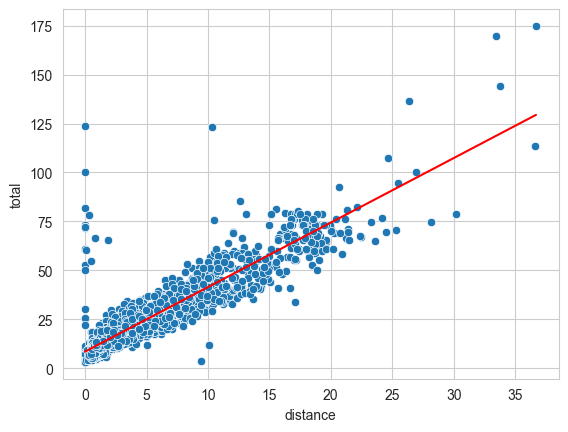

In [60]:
# Scatterplot erstellen mit Punkten aus Trainingsdatensatz und Regressionsgeraden
sns.scatterplot(x=X_train['distance'], y=y_train)
plt.plot([min_X_train, max_X_train], [min_total, max_total], color='red');

In [62]:
# Wie gut beschreibt unser Modell unsere Trainingsdaten? >>> R²:
model.score(X_train.values, y_train)

0.8270521580231154

## Und wie sieht es jetzt mit unseren Testdaten aus?

In [64]:
# Maximal- und Minimalwert unserer X-Daten herausfinden
min_X_test = X_test["distance"].min()
max_X_test = X_test["distance"].max()

print("Min:", min_X_test)
print("Max:", max_X_test)

Min: 0.0
Max: 28.3


In [65]:
# Mithilfe von Modell Vorhersagen für maximalen und minimalen Werte von X erstellen
predictions = model.predict([[min_X_test], [max_X_test]])
predictions

array([  8.56775056, 101.75029398])

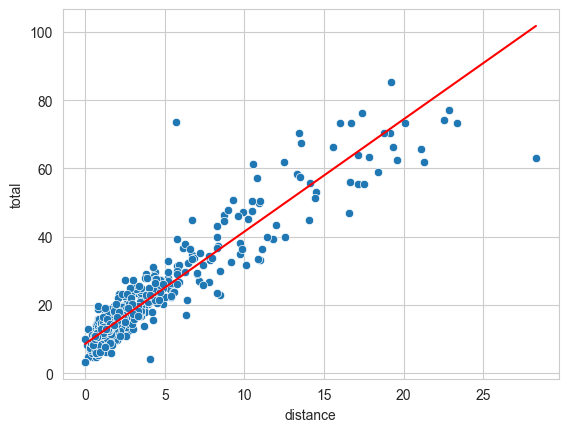

In [66]:
# Scatterplot mit Regressionslinie erzeugen
sns.scatterplot(x=X_test["distance"], y=y_test)
plt.plot([min_X_test, max_X_test], predictions, color="red")
plt.show()

In [68]:
# Wie gut beschreibt unser Modell unsere Testdaten? R²
model.score(X_test.values, y_test)

0.880772975552619

In [ ]:
# Unser Modell beschreibt unsere Variable schon ziemlich gut!

In [ ]:
# Eigentlich wäre das Ganze besser hier mit val statt mit test gewesen...

# Alternativ: mit statsmodel

In [74]:
# Konstante in Modell festlegen:
X_train_with_constant = sm.add_constant(X_train['distance'])

# Modell erstellen:
model_OLS = sm.OLS(y_train, X_train_with_constant)
result = model_OLS.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                 2.306e+04
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        10:49:19   Log-Likelihood:                -15307.
No. Observations:                4824   AIC:                         3.062e+04
Df Residuals:                    4822   BIC:                         3.063e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5678      0.106     80.813      0.000       8.360       8.776
distance       3.2927      0.022    151.853      0.000       3.250       3.335
==============================================================================
Omnibus:                     5822.821   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1521255.677
Skew:                           6.139   Prob(JB):                         0.00
Kurtosis:                      89.126   Cond. No.                         6.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Eine Spalte mit Einsen (für Y-Achsenabschnitt nötig):
X_train_with_constant

,const,distance
4586,1.0,0.60
809,1.0,2.60
2683,1.0,1.50
6253,1.0,0.75
6219,1.0,5.30
...,...,...
3772,1.0,1.47
5191,1.0,2.26
5226,1.0,0.90
5390,1.0,4.64


### Wann sollten wir statsmodels und wann sklearn verwenden?


#### Statsmodels ist besser für Statistische Auswertungen geeignet, sklearn ist spezialisiert auf Machine Learning, also auf Vorhersagen.

# Übungsaufgabe

### Lade den healthexp-Datensatz aus Seaborn und führe mit sklearn eine einfache lineare Regression durch. Die abhängige Variabel soll dabei die Spalte Life_Expectancy sein. Erstelle je ein Modell, in dem du nur die Spending_USD als unabhängige Variable nutzt und ein anderes Modell, in dem du nur die Spalte Year als unabhängige Variable nutzt.
### Vergleiche am Ende die Scores deiner beiden Modelle.

### Welche Lebenserwartung wird uns im Jahr 2040 vorausgesagt?
### Welche Lebenserwartung wird uns für 3000 Dollar vorhergesagt?

## Mit Year

In [83]:
health = sns.load_dataset('healthexp')
health

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


In [84]:
X = health[['Year']]
y = health['Life_Expectancy']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
model1 = LinearRegression()

model1.fit(X=X_train.values, y=y_train)
model1.score(X_test.values,y_test)

0.8341729409561374

In [87]:
model1.predict([[2040]])

array([86.7934405])

## Mit Spending_USD

In [88]:
X = health[['Spending_USD']]
y = health['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model2 = LinearRegression()

model2.fit(X=X_train.values, y=y_train)
print(model2.score(X_test.values,y_test))
print(model2.predict([[3000]]))

0.3573359515082699
[78.10968366]


## Lässt sich R² bei Taxis steigern? Versuch mit mehr Variablen in X!

In [75]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [76]:
# Wird nicht funktionieren!
# X = taxis.drop('distance', axis=1)
# y = taxis['distance']
# model = LinearRegression()
# model.fit(X, y)
# ML-Algorithmen brauchen normalerweise ausschließlich numerische Werte.

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [78]:
numeric_data = taxis.select_dtypes('number')
numeric_data

,passengers,distance,fare,tip,tolls,total
0,1,1.60,7.0,2.15,0.0,12.95
1,1,0.79,5.0,0.00,0.0,9.30
2,1,1.37,7.5,2.36,0.0,14.16
3,1,7.70,27.0,6.15,0.0,36.95
4,3,2.16,9.0,1.10,0.0,13.40
...,...,...,...,...,...,...
6428,1,0.75,4.5,1.06,0.0,6.36
6429,1,18.74,58.0,0.00,0.0,58.80
6430,1,4.14,16.0,0.00,0.0,17.30
6431,1,1.12,6.0,0.00,0.0,6.80


In [79]:
X = numeric_data.drop('total', axis=1)
y = numeric_data['total']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [81]:
# Mit Method Chaining (Methoden-Verkettung)
model = LinearRegression().fit(X_train, y_train)
model.score(X_test, y_test)

0.9940581424091566

In [ ]:
# R²-Steigerung von 0.88 auf 0.99!

# Übungsaufgabe

### Nutze nun zwei Variablen: Welche Lebenserwartung wird uns im Jahr 2040 mit Year und 3000 Spending_USD vorausgesagt?